<b>Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle

<b>Infromation About Dataset

In [2]:
# Load the Dataset
dataset = pd.read_csv("spamMassages.csv")

# Display the Data
dataset.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# Display the Shape of the Dataset
print("The Shape of the Dataset is : {}".format(dataset.shape))

The Shape of the Dataset is : (5572, 2)


In [4]:
# Count the Missing Values in the Dataset
nanValues = dataset.isnull().sum()

# Display the Total Count of Nan Values in the Dataset
print(nanValues)

Category    0
Message     0
dtype: int64


In [5]:
# Count the Duplicated Row in the Dataset
duplicatedData = dataset.duplicated().sum()

# Display the Total Count of Duplicated Row in the Dataset
print(duplicatedData)

415


In [6]:
# Drop the Duplicated Row from the Dataset
dataset.drop_duplicates(inplace = True)

# Display the Shape After Drop the Duplicated Row
print('The Shape of the Dataset is After drop the Duplicated Data : {}'.format(dataset.shape))

The Shape of the Dataset is After drop the Duplicated Data : (5157, 2)


In [7]:
# Find out the Total Count of the each Classes Label
countClasses = dataset["Category"].value_counts()

# Display the Total Count of the each Classes Label
print(countClasses)

ham     4516
spam     641
Name: Category, dtype: int64


In [8]:
# Display the Info of the Dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5157 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5157 non-null   object
 1   Message   5157 non-null   object
dtypes: object(2)
memory usage: 120.9+ KB
None


<b>Preprocessing the Text Data

In [9]:
# Load the Spacy Small Pre-Trained Model
nlp = spacy.load("en_core_web_sm")

In [10]:
def preprocessing_text(text):
    text = re.sub("[^a-zA-Z]" , " " , text) # Only extract the Text Data
    text = text.lower() # Convert the Text into lower Case
    text = nlp(text)  # Read the Text Data
    corpus = []

    # Clean the Text Data
    for token in text:
        if token.is_punct or token.is_stop or len(token) == 1 or len(token) == 2:
            continue
        corpus.append(token.lemma_)
    return " ".join(corpus)

In [11]:
# Apply the preprocessing text function into Message Data
dataset["cleanMessages"] = dataset["Message"].apply(preprocessing_text)

# Display the Data from the Dataset
dataset.head(3)

,Category,Message,cleanMessages
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis great world...
1,ham,Ok lar... Joking wif u oni...,lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win cup final tkts ...


In [12]:
# Convert the Category Column into Numerical Data
encoder = LabelEncoder()
dataset['Category'] = encoder.fit_transform(dataset['Category'])

<b>Convert the Text into Vectors

In [13]:
# convert the Dataset into Dependent & Independent Matrix
X = dataset.iloc[:,-1].values
Y = dataset.iloc[:,0].values

# Display the Shape of the X & Y Matrix
print('The Shape of the X Matrix is : {}'.format(X.shape))
print('The Shape of the Y Matrix is : {}'.format(Y.shape))

The Shape of the X Matrix is : (5157,)
The Shape of the Y Matrix is : (5157,)


In [14]:
# Create the Object of TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 1500)
X = tfidf.fit_transform(X).toarray()

**Split the Dataset into Training & Testing**

In [15]:
# Split the Dataset into Training & Testing Data
x_train ,  x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.25 , random_state = 42)

# Display the Shape of the Training & Testing Data
print('The Shape of the X Train is : {}'.format(x_train.shape))
print('The Shape of the Y Train is : {}'.format(y_train.shape))
print('The Shape of the X Test  is : {}'.format(x_test.shape))
print('The Shape of the Y Test  is : {}'.format(y_test.shape))

The Shape of the X Train is : (3867, 1500)
The Shape of the Y Train is : (3867,)
The Shape of the X Test  is : (1290, 1500)
The Shape of the Y Test  is : (1290,)


<b>Machine Learning Model

In [16]:
# Create the Model Result function to return the Result of the Model
def model_result(model , x_train , x_test , y_train , y_test):
    # Fit the Model in the Training Data
    model.fit(x_train , y_train)

    # Predict the Result
    prediction = model.predict(x_test)
    # Accuracy Score
    acc = accuracy_score(y_test , prediction)
    # Confusion Matrix
    con = confusion_matrix(y_test , prediction)
    # Classification Report
    report = classification_report(y_test , prediction)

    return model , prediction , acc , con , report

Logistic Regression

In [17]:
# Create the Object of the Logistic Regression
model_LR =  LogisticRegression()

# Call the model_result Function
model_LR , prediction_LR , acc_LR , con_LR , report_LR = model_result(model_LR , x_train ,  x_test , y_train , y_test)

# Display the Accuracy
print("The Accuracy of the Logistic Regression Model is : {}".format(acc_LR))
# Display the Classification Report
print(report_LR)

The Accuracy of the Logistic Regression Model is : 0.9534883720930233
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1124
           1       0.93      0.69      0.79       166

    accuracy                           0.95      1290
   macro avg       0.94      0.84      0.88      1290
weighted avg       0.95      0.95      0.95      1290



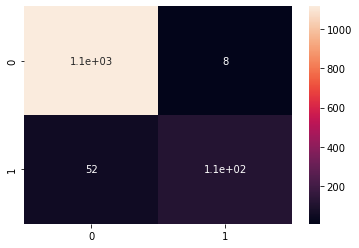

In [18]:
# Display the Confusion Matrix by using Heatmap
sns.heatmap(con_LR , annot = True)
plt.show()

Decision Tree Classifier

In [19]:
# Create the Object of the Decision Tree Classifier
model_DT =  DecisionTreeClassifier()

# Call the model_result Function
model_DT , prediction_DT , acc_DT , con_DT , report_DT = model_result(model_DT , x_train ,  x_test , y_train , y_test)

# Display the Accuracy
print("The Accuracy of the Decision Tree Classifier Model is : {}".format(acc_DT))
# Display the Classification Report
print(report_DT)

The Accuracy of the Decision Tree Classifier Model is : 0.958139534883721
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1124
           1       0.81      0.89      0.84       166

    accuracy                           0.96      1290
   macro avg       0.90      0.93      0.91      1290
weighted avg       0.96      0.96      0.96      1290



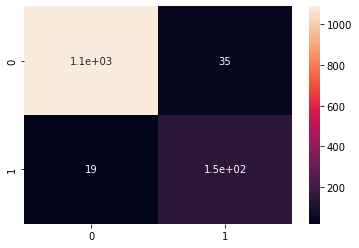

In [20]:
# Display the Confusion Matrix by using Heatmap
sns.heatmap(con_DT , annot = True)
plt.show()

Random Forest Classifier

In [21]:
# Create the Object of the Random Forest Classifier
model_RT =  RandomForestClassifier()

# Call the model_result Function
model_RT , prediction_RT , acc_RT , con_RT , report_RT = model_result(model_RT , x_train ,  x_test , y_train , y_test)

# Display the Accuracy
print("The Accuracy of the Random Forest Classifier Model is : {}".format(acc_RT))
# Display the Classification Report
print(report_RT)

The Accuracy of the Random Forest Classifier Model is : 0.982170542635659
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1124
           1       0.96      0.90      0.93       166

    accuracy                           0.98      1290
   macro avg       0.97      0.95      0.96      1290
weighted avg       0.98      0.98      0.98      1290



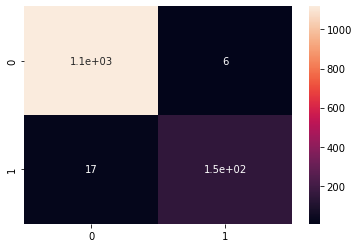

In [22]:
# Display the Confusion Matrix by using Heatmap
sns.heatmap(con_RT , annot = True)
plt.show()

<b>Model Selection

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


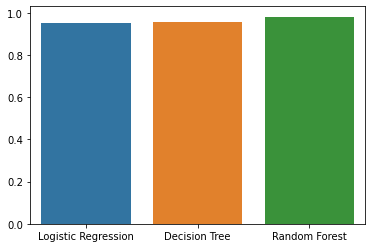

In [23]:
# Accuracy of All Model
acc = [acc_LR , acc_DT , acc_RT]

# All Models Name
model = ['Logistic Regression' , 'Decision Tree' , 'Random Forest']

# Display the All Model with Accuracy
sns.barplot(model , acc)
plt.show()

In [24]:
# Save the Model and Vectorizer
pickle.dump((tfidf) , open("Vectroizer.pkl" , "wb"))
pickle.dump((model_RT) , open("model.pkl" , "wb"))